In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential,Model
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

%matplotlib inline

** Use pandas to read in the csv file called anonymized_data.csv . It contains 500 rows and 30 columns of anonymized data along with 1 last column with a classification label, where the columns have been renamed to 4 letter codes.**

In [2]:
data = pd.read_csv('anonymized_data.csv')
data.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EJWY    500 non-null    float64
 1   VALM    500 non-null    float64
 2   EGXO    500 non-null    float64
 3   HTGR    500 non-null    float64
 4   SKRF    500 non-null    float64
 5   NNSZ    500 non-null    float64
 6   NYLC    500 non-null    float64
 7   GWID    500 non-null    float64
 8   TVUT    500 non-null    float64
 9   CJHI    500 non-null    float64
 10  NVFW    500 non-null    float64
 11  VLBG    500 non-null    float64
 12  IDIX    500 non-null    float64
 13  UVHN    500 non-null    float64
 14  IWOT    500 non-null    float64
 15  LEMB    500 non-null    float64
 16  QMYY    500 non-null    float64
 17  XDGR    500 non-null    float64
 18  ODZS    500 non-null    float64
 19  LNJS    500 non-null    float64
 20  WDRT    500 non-null    float64
 21  LKKS    500 non-null    float64
 22  UO

In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.drop('Label',axis=1))
scaled_data.shape

(500, 30)

In [5]:
num_inputs = 30
num_hidden = 2 
num_outputs = num_inputs # Must be true for an autoencoder!

In [6]:
model = Sequential()

model.add(Dense(num_inputs, input_shape=[num_inputs]))
model.add(Dense(num_hidden))
model.add(Dense(num_outputs))

model.compile(optimizer=Adam(0.001), metrics=['accuracy'], loss='mae')

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 62        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                90        
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
None


** Now plot out the reduced dimensional representation of the data. Do you still have clear separation of classes even with the reduction in dimensions? Hint: You definitely should, the classes should still be clearly seperable, even when reduced to 2 dimensions. **

In [7]:
model.fit(x=scaled_data, y=scaled_data, epochs=1000, batch_size=32)

Epoch 1/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.0100
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.0280
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.0280
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4157 - accuracy: 0.0260
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.0320
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.0340
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3419 - accuracy: 0.0360
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.0800
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2971 - accuracy: 0.1080
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.1080

16/16 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.2340
Epoch 83/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2280
Epoch 84/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.2320
Epoch 85/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2320
Epoch 86/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.2300
Epoch 87/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.2340
Epoch 88/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.2480
Epoch 89/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.2340
Epoch 90/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.2340
Epoch 91/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.2340
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2200
Epoch 163/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.2300
Epoch 164/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2340
Epoch 165/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2220
Epoch 166/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.2360
Epoch 167/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2300
Epoch 168/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.2420
Epoch 169/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2300
Epoch 170/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2360
Epoch 171/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2280
Epoch 242/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2320
Epoch 243/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.2400
Epoch 244/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2220
Epoch 245/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.2160
Epoch 246/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.2300
Epoch 247/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.2320
Epoch 248/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2280
Epoch 249/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.2260
Epoch 250/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.

16/16 [==============================] - 0s 1ms/step - loss: 0.0751 - accuracy: 0.2320
Epoch 322/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.2320
Epoch 323/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.2340
Epoch 324/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.2500
Epoch 325/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2280
Epoch 326/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.2300
Epoch 327/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2380
Epoch 328/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2360
Epoch 329/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.2420
Epoch 330/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.2280
Epoch 402/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.2260
Epoch 403/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2180
Epoch 404/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.2320
Epoch 405/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.2180
Epoch 406/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0750 - accuracy: 0.2440
Epoch 407/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.2300
Epoch 408/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.2120
Epoch 409/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2320
Epoch 410/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.

16/16 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.2380
Epoch 482/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.2340
Epoch 483/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2280
Epoch 484/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.2360
Epoch 485/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2340
Epoch 486/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.2380
Epoch 487/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2420
Epoch 488/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0749 - accuracy: 0.2240
Epoch 489/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2380
Epoch 490/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.2380
Epoch 562/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2320
Epoch 563/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2360
Epoch 564/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2260
Epoch 565/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2300
Epoch 566/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2240
Epoch 567/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2340
Epoch 568/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2420
Epoch 569/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2320
Epoch 570/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.2400
Epoch 642/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.2320
Epoch 643/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2300
Epoch 644/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2300
Epoch 645/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2380
Epoch 646/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2360
Epoch 647/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.2300
Epoch 648/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2460
Epoch 649/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2400
Epoch 650/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.

16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2420
Epoch 722/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.2260
Epoch 723/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.2340
Epoch 724/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2340
Epoch 725/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2320
Epoch 726/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2340
Epoch 727/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2380
Epoch 728/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2360
Epoch 729/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2360
Epoch 730/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.2400
Epoch 802/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2340
Epoch 803/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2160
Epoch 804/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2220
Epoch 805/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2340
Epoch 806/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.2380
Epoch 807/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2320
Epoch 808/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0746 - accuracy: 0.2200
Epoch 809/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.2360
Epoch 810/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.

16/16 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.2240
Epoch 882/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.2340
Epoch 883/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.2300
Epoch 884/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.2340
Epoch 885/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2400
Epoch 886/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.2320
Epoch 887/1000
16/16 [==============================] - ETA: 0s - loss: 0.0722 - accuracy: 0.28 - 0s 1ms/step - loss: 0.0744 - accuracy: 0.2400
Epoch 888/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.2260
Epoch 889/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2380
Epoch 890/1000
16/16 [==============================] -

16/16 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.2400
Epoch 961/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.2380
Epoch 962/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.2420
Epoch 963/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.2320
Epoch 964/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.2320
Epoch 965/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.2300
Epoch 966/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.2300
Epoch 967/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.2380
Epoch 968/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.2320
Epoch 969/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.

In [8]:
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(index=1).output)
intermediate_output = intermediate_layer_model.predict(scaled_data)

In [9]:
intermediate_output.shape

(500, 2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

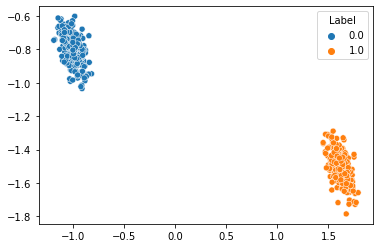

In [10]:
sns.scatterplot(intermediate_output[:,0],intermediate_output[:,1],hue=data['Label'])